In [1]:
# import subprocess

# packages = ['geemap', 'geopandas',
#             'shapely', 'requests', 
#             'osgeo', 'rasterio', 'numpy',
#             'sklearn', 'fiona', 'pyproj',
#             'matplotlib', 'pandas',
#             'seaborn','geocube', 'os']

# for package in packages:
#     try:
#         __import__(package)
#     except ImportError:
#         subprocess.check_call(['pip', 'install', package])

import neccessary libaries

In [37]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
import json
import rasterio as rio

import shapely
import fiona
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

load datasets and converts it into point

In [38]:
# load sampling point data collected on the field
training_dataset = gpd.read_file('training_dataset.csv')

# convert csv file to geopoint
point_data = gpd.GeoDataFrame(
    training_dataset, geometry=gpd.points_from_xy(training_dataset.longitude,training_dataset.latitude), crs="EPSG:4326")

point_data.head()

,SOC_gkg,latitude,longitude,elevation,slope,landcover,rainfall,lst,ndvi,twi,smi,soil_ph,soil_texture,geometry
0,8.440308059039999,-10.160223133000001,-49.850637085999999,185,0.2705162,10,19218.950924108118,31.576700210000013,0.56143564,16.44847337867082,0.8568150702297046,5.2,6,POINT (-49.85064 -10.16022)
1,2.765353636110000,-11.789786957000000,-48.614034791000002,232,0.15954293,80,17822.62554610617,28.394523590000006,0.5609932,15.244500574344883,0.8332107905278638,5.3,6,POINT (-48.61403 -11.78979)
2,6.084392265510000,-9.709371274000000,-49.203478406999999,226,1.0694934,30,20349.224002773608,33.06866594000002,0.5840673,18.116180199228896,0.8678819532478071,5.2,6,POINT (-49.20348 -9.70937)
3,8.027136231729999,-9.706367021000000,-48.544403447999997,253,0.40395045,30,19063.720844127107,34.49398028000002,0.5082451,16.091798434732087,0.8784544394300494,5.2,6,POINT (-48.54440 -9.70637)
4,9.672289075060000,-13.038174777000000,-48.543180286000002,459,3.5469897,10,15968.951756189483,34.22395670000003,0.4659759,15.244500574344883,0.8764514984027183,5.5,6,POINT (-48.54318 -13.03817)


In [39]:
point_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SOC_gkg       532 non-null    object  
 1   latitude      532 non-null    object  
 2   longitude     532 non-null    object  
 3   elevation     532 non-null    object  
 4   slope         532 non-null    object  
 5   landcover     532 non-null    object  
 6   rainfall      532 non-null    object  
 7   lst           532 non-null    object  
 8   ndvi          532 non-null    object  
 9   twi           532 non-null    object  
 10  smi           532 non-null    object  
 11  soil_ph       532 non-null    object  
 12  soil_texture  532 non-null    object  
 13  geometry      532 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 58.3+ KB


In [40]:
point_data.describe()

,SOC_gkg,latitude,longitude,elevation,slope,landcover,rainfall,lst,ndvi,twi,smi,soil_ph,soil_texture,geometry
count,532,532,532,532,532,532,532,532,532,532,532,532,532,532
unique,532,532,532,262,518,6,516,497,513,196,497,14,4,532
top,8.440308059039999,-10.160223133000001,-49.850637085999999,232,0.03864545,30,17009.358865013666,31.14090266000005,0.5983826,14.656713909442765,0.8535824755336956,5.4,6,POINT (-49.850637086 -10.160223133)
freq,1,1,1,7,10,237,2,2,2,48,2,114,504,1


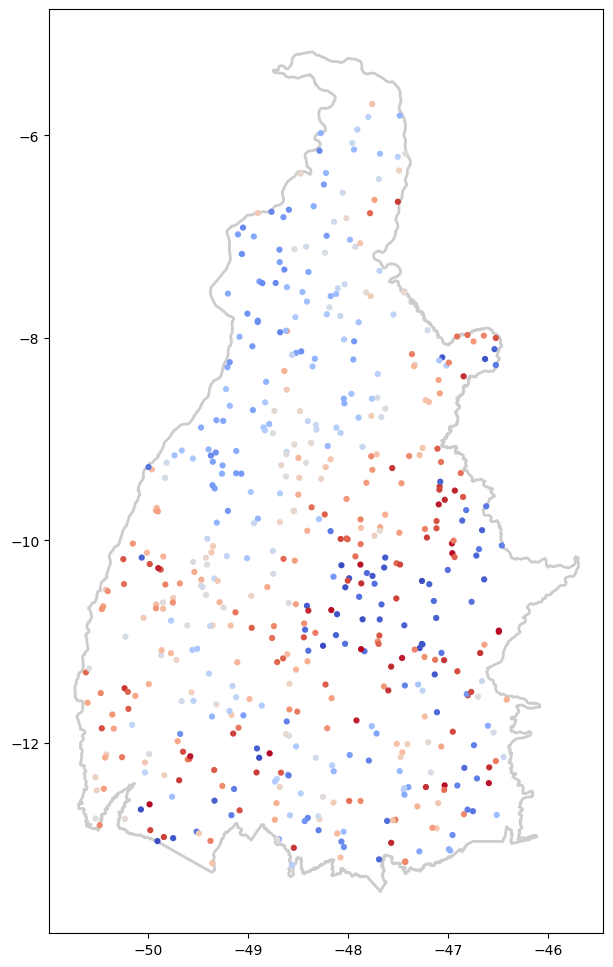

In [41]:
# boudnary of the area of study
boundary = gpd.read_file('data/tocantins.shp')

# plot the random points to see the distribution
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1)
ax = boundary.plot(ax=ax, linewidth=2, color='white', edgecolor='0.8')
point_data.plot(column= "SOC_gkg", ax=ax,k=5, markersize=12,cmap='coolwarm');

### Exploratory Data Analysis
- Now lets explore our dataset, we will check for missing value, plot our data and also check the correlation between the dataset
- Examine the relattion among the various varaible that will be sued to build our model
- perform OLS and correlelation analysis to understand the data better

In [6]:
#check that there is no no data values in the dataset
print(point_data.head().isnull().sum())

SOC_gkg         0
latitude        0
longitude       0
elevation       0
slope           0
landcover       0
rainfall        0
lst             0
ndvi            0
twi             0
smi             0
soil_ph         0
soil_texture    0
geometry        0
dtype: int64


In [42]:
point_data.SOC_gkg.max()

'9.994598094590000'

<AxesSubplot: >

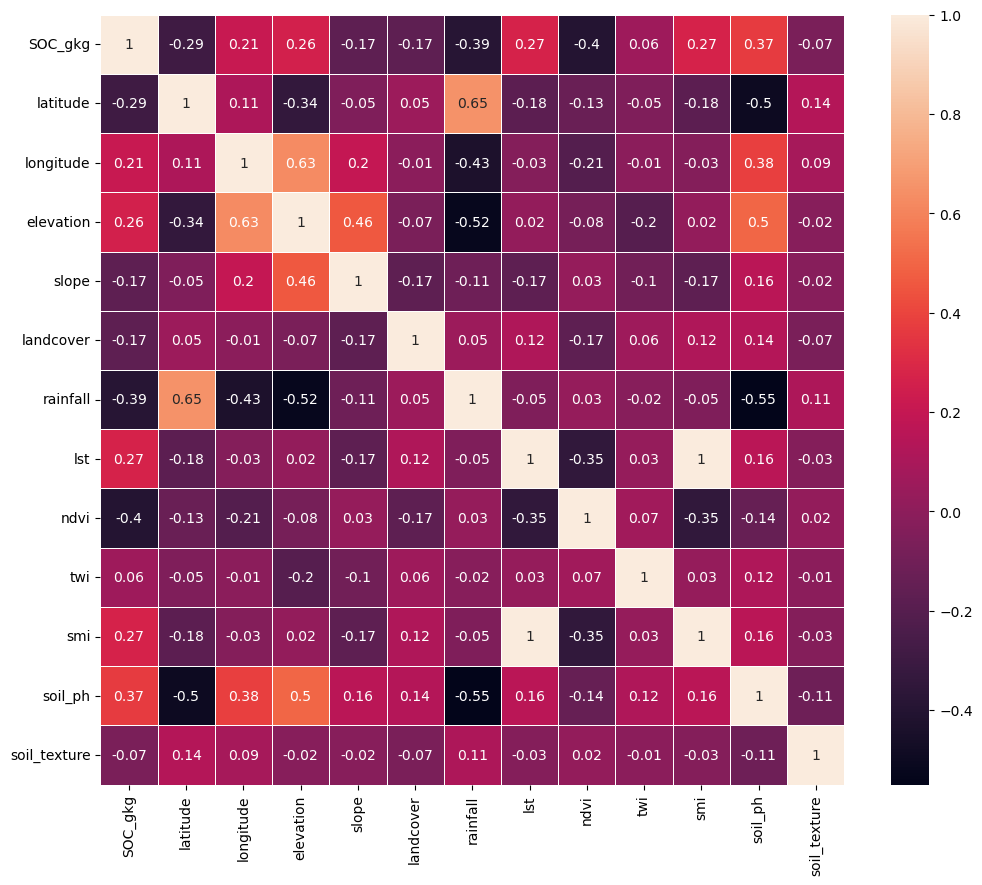

In [7]:
point_data.drop(columns='geometry',inplace=True)

# show the correlation matric for the dataset
corrMatrix = point_data.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
#sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(round(corrMatrix,2), annot=True, linewidths=.5, ax=ax)

In [8]:
corrMatrix['SOC_gkg']

SOC_gkg         1.000000
latitude       -0.294703
longitude       0.213758
elevation       0.256445
slope          -0.168904
landcover      -0.166151
rainfall       -0.390290
lst             0.268501
ndvi           -0.395732
twi             0.063803
smi             0.268501
soil_ph         0.370432
soil_texture   -0.069164
Name: SOC_gkg, dtype: float64

In [9]:
# Convert all columns to numeric values to avoid type issues
point_data = point_data.apply(pd.to_numeric, errors='coerce')

point_data.head()

,SOC_gkg,latitude,longitude,elevation,slope,landcover,rainfall,lst,ndvi,twi,smi,soil_ph,soil_texture
0,8.440308,-10.160223,-49.850637,185,0.270516,10,19218.950924,31.576700,0.561436,16.448473,0.856815,5.2,6
1,2.765354,-11.789787,-48.614035,232,0.159543,80,17822.625546,28.394524,0.560993,15.244501,0.833211,5.3,6
2,6.084392,-9.709371,-49.203478,226,1.069493,30,20349.224003,33.068666,0.584067,18.116180,0.867882,5.2,6
3,8.027136,-9.706367,-48.544403,253,0.403950,30,19063.720844,34.493980,0.508245,16.091798,0.878454,5.2,6
4,9.672289,-13.038175,-48.543180,459,3.546990,10,15968.951756,34.223957,0.465976,15.244501,0.876451,5.5,6


Check For outliers

<AxesSubplot: ylabel='Frequency'>

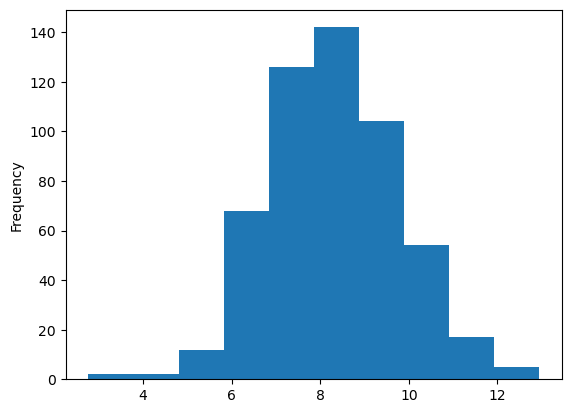

In [10]:
point_data['SOC_gkg'].plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

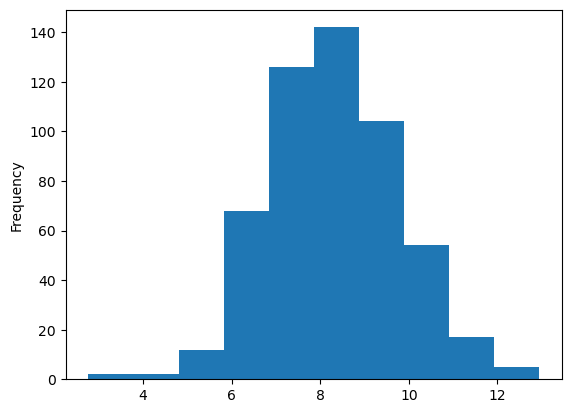

In [12]:
point_data = point_data[point_data['SOC_gkg'] <30]
point_data['SOC_gkg'].plot(kind='hist')

OLS regression

In [11]:
import statsmodels.formula.api as smf

# Define the dependent variable that needs to be predicted (labels)
y = point_data["SOC_gkg"].values

# Define the independent variables. Let's also drop geometry and label
x =  point_data.drop(labels=["SOC_gkg"], axis=1)
features_list = list(x.columns)  # List features so we can rank their importance later

# Fit the model
model = smf.ols(formula="SOC_gkg ~ " + " + ".join(features_list), data=point_data)
results = model.fit()

# Model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                SOC_gkg   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     42.50
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.01e-65
Time:                        19:21:23   Log-Likelihood:                -785.88
No. Observations:                 532   AIC:                             1596.
Df Residuals:                     520   BIC:                             1647.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7646      3.186     -0.240   

Visualize data

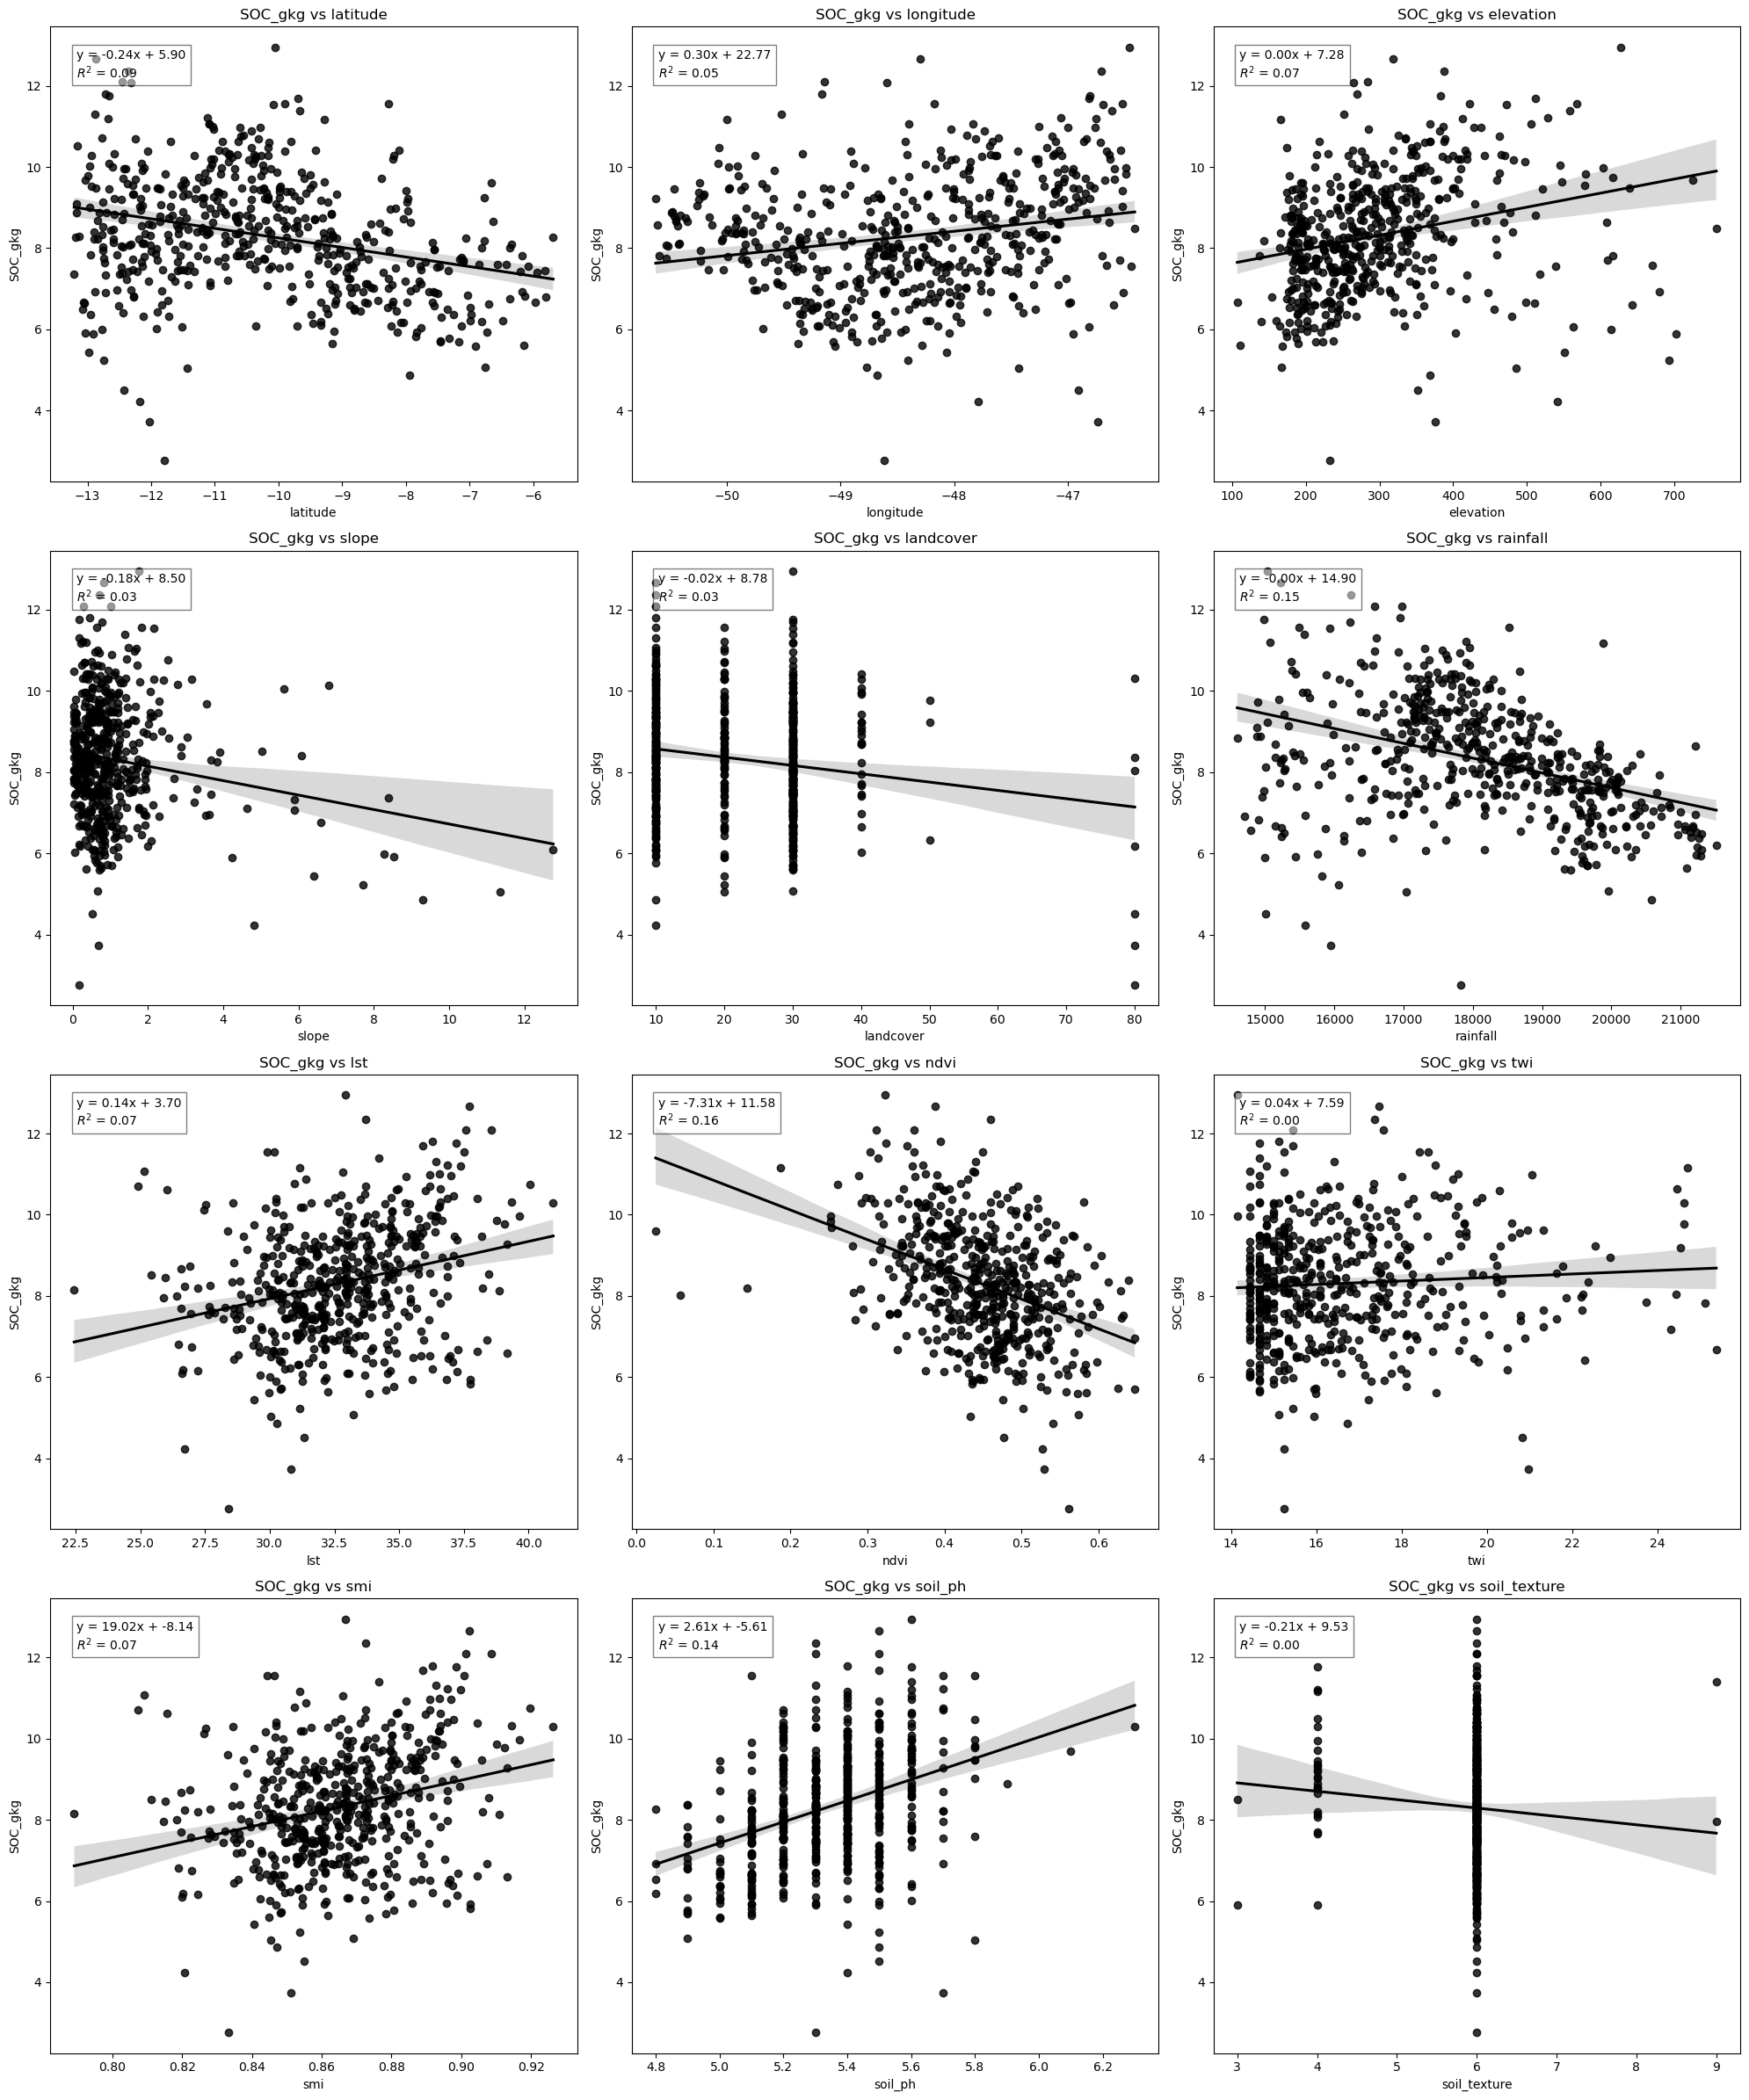

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to grayscale
sns.set_palette("gray")

# List of all columns except 'SOC_gkg'
columns = point_data.columns.drop('SOC_gkg')

# Create a figure with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 24))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each column and plot against SOC_gkg
for i, col in enumerate(columns):
    # Plot the data in grayscale mode
    sns.regplot(x=point_data[col], y=point_data['SOC_gkg'], ax=axes[i], color="black")
    
    # Perform linear regression to get the equation details
    X = point_data[[col]].values  # Convert to 2D array
    y = point_data['SOC_gkg'].values
    reg = LinearRegression().fit(X, y)
    
    # Get the slope and intercept
    slope = reg.coef_[0]
    intercept = reg.intercept_
    r_squared = reg.score(X, y)

    # Display the equation and R-squared on the plot
    axes[i].text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}', 
                 transform=axes[i].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    axes[i].set_title(f'SOC_gkg vs {col}')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
point_data.drop(columns=['soil_ph','soil_texture','landcover'],inplace=True)
point_data.head()

# 'latitude','longitude'

,SOC_gkg,latitude,longitude,elevation,slope,rainfall,lst,ndvi,twi,smi
0,8.440308,-10.160223,-49.850637,185,0.270516,19218.950924,31.576700,0.561436,16.448473,0.856815
1,2.765354,-11.789787,-48.614035,232,0.159543,17822.625546,28.394524,0.560993,15.244501,0.833211
2,6.084392,-9.709371,-49.203478,226,1.069493,20349.224003,33.068666,0.584067,18.116180,0.867882
3,8.027136,-9.706367,-48.544403,253,0.403950,19063.720844,34.493980,0.508245,16.091798,0.878454
4,9.672289,-13.038175,-48.543180,459,3.546990,15968.951756,34.223957,0.465976,15.244501,0.876451


In [35]:
point_data.SOC_gkg.max()

12.9470999775

Scale data

In [15]:
from sklearn.preprocessing import StandardScaler

# Assuming point_data is your DataFrame
features = point_data.drop('SOC_gkg', axis=1)  # All features except SOC_gkg
target = point_data['SOC_gkg']  # Target variable

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Reconstruct the DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled DataFrame
scaled_data['SOC_gkg'] = target.values

# Display the scaled data
scaled_data.head()

,latitude,longitude,elevation,slope,rainfall,lst,ndvi,twi,smi,SOC_gkg
0,0.041869,-1.426924,-1.034789,-0.580924,0.719029,-0.395115,1.444212,-0.082059,-0.395115,8.440308
1,-0.848841,-0.242424,-0.600918,-0.660972,-0.173381,-1.539907,1.438616,-0.638709,-1.539907,2.765354
2,0.288301,-0.807033,-0.656306,-0.004603,1.441402,0.141622,1.730470,0.688996,0.141622,6.084392
3,0.289943,-0.175727,-0.407061,-0.484675,0.619820,0.654381,0.771430,-0.246965,0.654381,8.027136
4,-1.531202,-0.174555,1.494583,1.782474,-1.358089,0.557239,0.236786,-0.638709,0.557239,9.672289


###

###  MACHINE LEARNING MODEL


* import the ML libaries
* load the data
* split the data into dependent and independent variable
* splitt the dataset into training and test test
* Build our model uisng Random Forest Regressor, Supporting Vector Regressor, DecisionTree Regressor, GradientBooosting Regressor, Linear Regression
* Check the accuracy of our model uisng various acuracy metrics

In [16]:
# import require libaries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (r2_score, accuracy_score, mean_squared_error,
                                    mean_absolute_error)

from sklearn.model_selection import (train_test_split, cross_val_score,
                                            GridSearchCV)

In [128]:
#load the dataset 
scaled_data.head()

,latitude,longitude,elevation,slope,rainfall,lst,ndvi,twi,smi,SOC_gkg
0,0.041869,-1.426924,-1.034789,-0.580924,0.719029,-0.395115,1.444212,-0.082059,-0.395115,8.440308
1,-0.848841,-0.242424,-0.600918,-0.660972,-0.173381,-1.539907,1.438616,-0.638709,-1.539907,2.765354
2,0.288301,-0.807033,-0.656306,-0.004603,1.441402,0.141622,1.730470,0.688996,0.141622,6.084392
3,0.289943,-0.175727,-0.407061,-0.484675,0.619820,0.654381,0.771430,-0.246965,0.654381,8.027136
4,-1.531202,-0.174555,1.494583,1.782474,-1.358089,0.557239,0.236786,-0.638709,0.557239,9.672289


In [129]:
scaled_data.SOC_gkg.max()

12.9470999775

Split data into label and predictor

In [130]:
# Define the dependent variable that needs to be predicted (labels)
y= scaled_data["SOC_gkg"].values
# Define the independent variables. Let's also drop gemotry and label
X = scaled_data.drop(labels = ["SOC_gkg"], axis=1) # "geometry"
features_list = list(X.columns)  #List features so we can rank their importance later 

Split Data into training and test sets

* Split data into train (60%), validate (20 %) and test (20%) to verify accuracy after fitting the model.
* training data is used to train the model
* validation data is used for hyperparameter tuning
* testing data is used to test the model

In [131]:
import random
random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

## Training and Evaluation on the Training set

Random Forest Regressor Model

In [132]:
# instantiate the Random Forest Model
rf_model = RandomForestRegressor(n_estimators =1000, random_state = 42)
# Train the model on training data
rf_model.fit(X_train, y_train)
# make prediction for the test dataset.
rf_prediction = rf_model.predict(X_test)
# The prediction SOC value
rf_prediction[:10]

array([9.38437638, 7.07706004, 7.81254784, 8.1636746 , 8.75644404,
       9.22462404, 7.41958845, 8.07880517, 8.50580934, 7.52439379])

Suporting Vector Regressor

In [133]:
# instantiate the SVR
svr_model = SVR(C=10, gamma='scale', kernel='rbf')  # C=0.1, gamma=0.001, kernel='linear'
# Train the model on training data
svr_model.fit(X_train, y_train)
svr_prediction = svr_model.predict(X_test)
# The prediction SOC value
svr_prediction[:10]

array([10.101475  ,  7.52496901,  8.20155944,  8.30897934,  8.81555723,
       10.28175658,  7.75847516,  8.25524816,  8.62766227,  8.16623563])

DecisisonTree Regressor

In [134]:
# instantiate the DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 42,max_depth=None, min_samples_split=10)
# Train the model on training data
dtr_model.fit(X_train, y_train)
dtr_prediction =dtr_model.predict(X_test)
# The prediction SOC value
dtr_prediction[:10]

array([8.27991298, 6.01721619, 8.02743356, 8.97540834, 9.32292584,
       8.97540834, 7.29077121, 8.30804784, 9.11373365, 7.54252553])

GradientBoost Regressor

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
# instantiate the DecisionTreeRegressor
gbr_model = GradientBoostingRegressor(random_state = 42,learning_rate=0.1, max_depth=5, n_estimators=200)
# Train the model on training data
gbr_model.fit(X_train, y_train)
gbr_prediction =gbr_model.predict(X_test)
# The prediction SOC value
gbr_prediction[:10]

array([10.11357174,  7.52263227,  7.93364906,  7.77191723,  8.50573058,
        9.75612372,  7.09130462,  8.05482175,  8.45011137,  7.60189692])

#### Evaluation Using Score Accuracy

In [136]:
np.random.seed(42)


models = []
models.append(('RF', RandomForestRegressor(random_state = 42,max_depth=20, min_samples_split=2, n_estimators=100)))
models.append(('SVR', SVR(C=10, gamma='scale', kernel='rbf')))
models.append(('GBR', GradientBoostingRegressor(random_state = 42,learning_rate=0.1, max_depth=5, n_estimators=200)))
models.append(('DTR', DecisionTreeRegressor(random_state = 42,max_depth=None, min_samples_split=10)))


names = []
mae_scores = []
mse_scores = []
r2_scores = []
rsme_score = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_scores.append(round(mean_absolute_error(y_test, y_pred), 4))
    mse_scores.append(round(mean_squared_error(y_test, y_pred), 4))
    r2_scores.append(round(r2_score(y_test, y_pred), 4))
    rsme_score.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    names.append(name)

# Create a DataFrame to display the results
accuracy_scores = pd.DataFrame({
    'Name': names,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R2': r2_scores,
    'RSME':rsme_score
})

accuracy_scores

,Name,MAE,MSE,R2,RSME
0,RF,0.5142,0.4650,0.7236,0.68
1,SVR,0.4896,0.5134,0.6949,0.72
2,GBR,0.5000,0.4221,0.7491,0.65
3,DTR,0.7475,0.9968,0.4075,1.00


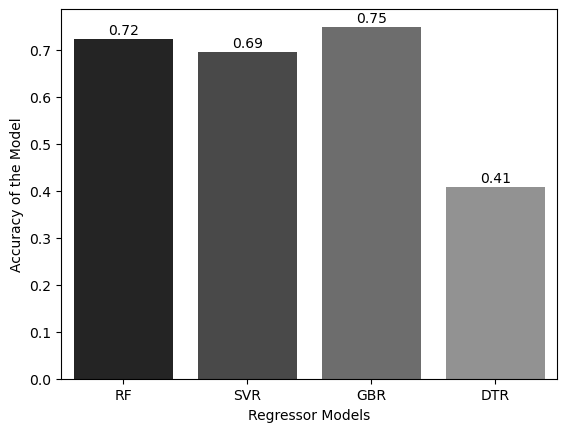

In [137]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'R2', data=accuracy_scores)
axis.set(xlabel='Regressor Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.2f}'.format(height), ha="center") 
plt.show()

Predicted Vs Actual

In [138]:
# Create DataFrame
df = pd.DataFrame({
    'actual': y_test,
    'rf_prediction': rf_prediction,
    'dtr_prediction': dtr_prediction,
    'svr_prediction': svr_prediction,
    'gbr_prediction': gbr_prediction
})

df


,actual,rf_prediction,dtr_prediction,svr_prediction,gbr_prediction
0,11.304944,9.384376,8.279913,10.101475,10.113572
1,7.615645,7.077060,6.017216,7.524969,7.522632
2,8.415332,7.812548,8.027434,8.201559,7.933649
3,8.091934,8.163675,8.975408,8.308979,7.771917
4,8.159987,8.756444,9.322926,8.815557,8.505731
...,...,...,...,...,...
102,7.952759,8.706095,7.990901,8.645713,8.816586
103,7.786302,8.373845,8.430405,8.285202,7.844778
104,9.354565,9.431087,10.208258,9.404805,9.869940
105,7.517751,7.949303,8.314440,7.712612,8.049782


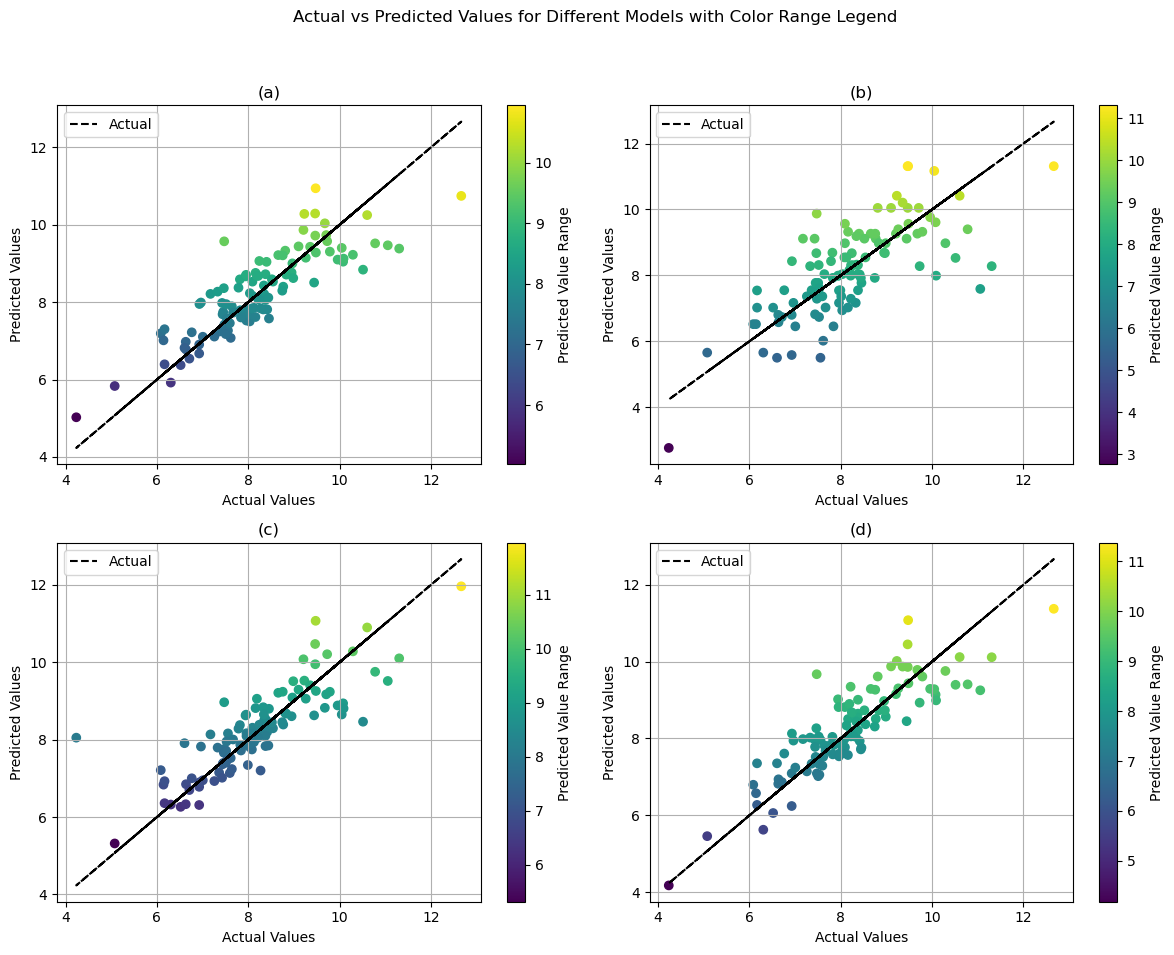

In [141]:

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Actual vs Predicted Values for Different Models with Color Range Legend')

# Define a colormap
cmap = plt.cm.viridis

# Scatter plot for Random Forest
sc_rf = axs[0, 0].scatter(df['actual'], df['rf_prediction'], c=df['rf_prediction'], cmap=cmap)
axs[0, 0].plot(df['actual'], df['actual'], color='black', linestyle='--', label='Actual')
axs[0, 0].set_title('(a)')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Predicted Values')
plt.colorbar(sc_rf, ax=axs[0, 0], label='Predicted Value Range')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Scatter plot for Decision Tree
sc_dtr = axs[0, 1].scatter(df['actual'], df['dtr_prediction'], c=df['dtr_prediction'], cmap=cmap)
axs[0, 1].plot(df['actual'], df['actual'], color='black', linestyle='--', label='Actual')
axs[0, 1].set_title('(b)')
axs[0, 1].set_xlabel('Actual Values')
axs[0, 1].set_ylabel('Predicted Values')
plt.colorbar(sc_dtr, ax=axs[0, 1], label='Predicted Value Range')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Scatter plot for SVR
sc_svr = axs[1, 0].scatter(df['actual'], df['svr_prediction'], c=df['svr_prediction'], cmap=cmap)
axs[1, 0].plot(df['actual'], df['actual'], color='black', linestyle='--', label='Actual')
axs[1, 0].set_title('(c)')
axs[1, 0].set_xlabel('Actual Values')
axs[1, 0].set_ylabel('Predicted Values')
plt.colorbar(sc_svr, ax=axs[1, 0], label='Predicted Value Range')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Scatter plot for Gradient Boosting
sc_gbr = axs[1, 1].scatter(df['actual'], df['gbr_prediction'], c=df['gbr_prediction'], cmap=cmap)
axs[1, 1].plot(df['actual'], df['actual'], color='black', linestyle='--', label='Actual')
axs[1, 1].set_title('(d)')
axs[1, 1].set_xlabel('Actual Values')
axs[1, 1].set_ylabel('Predicted Values')
plt.colorbar(sc_gbr, ax=axs[1, 1], label='Predicted Value Range')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Evaluation Using Cross Validation

In [ ]:
# models = []
# models.append(('RF', RandomForestRegressor()))
# models.append(('SVR', SVR()))  # Fixed model name
# models.append(('GBR', GradientBoostingRegressor()))
# models.append(('DTR', DecisionTreeRegressor()))
# models.append(('LR', LinearRegression()))

# names = []
# scores = []
# for name, model in models:
#     cross_val_results = cross_val_score(model, X_val, y_val,
#                                         scoring="neg_mean_squared_error", cv=10)
#     scores.append(round(np.sqrt(-cross_val_results.mean())))  # Negate the scores and round
#     names.append(name)

# validation = pd.DataFrame({'Name': names, 'Score': scores})
# validation

#### Hyperparameter Tunnning

Grid Search

In [ ]:
# # Define hyperparameter grids with explanations
# param_grid_random_forest = {
#     # Number of trees in the forest
#     'n_estimators': [50, 100, 200],  # More trees usually give better performance but increase computation time
#     # Maximum depth of the tree
#     'max_depth': [None, 10, 20, 30],  # None means nodes are expanded until all leaves are pure or contain less than min_samples_split samples
#     # Minimum number of samples required to split an internal node
#     'min_samples_split': [2, 5, 10]  # The minimum number of samples required to split an internal node
# }

# param_grid_svr = {
#     # Penalty parameter C of the error term
#     'C': [0.1, 1, 10],  # Regularization parameter, with lower values leading to stronger regularization
#     # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     'gamma': [1e-3, 1e-4, 'scale'],  # 'scale' is the default; 1e-3 and 1e-4 are smaller values for higher smoothness
#     # Specifies the kernel type to be used in the algorithm
#     'kernel': ['linear', 'rbf']  # Linear and Radial Basis Function kernels are commonly used
# }

# param_grid_decision_tree = {
#     # Maximum depth of the tree
#     'max_depth': [None, 10, 20, 30],  # None means nodes are expanded until all leaves are pure or contain less than min_samples_split samples
#     # Minimum number of samples required to split an internal node
#     'min_samples_split': [2, 5, 10]  # The minimum number of samples required to split an internal node
# }

# param_grid_gradient_boosting = {
#     # Number of boosting stages to be run
#     'n_estimators': [50, 100, 200],  # More stages can lead to overfitting, hence we check up to 200
#     # Learning rate shrinks the contribution of each tree
#     'learning_rate': [0.01, 0.1, 0.2],  # Lower learning rates need more stages to converge
#     # Maximum depth of the individual regression estimators
#     'max_depth': [3, 5, 7],  # Shallow trees (lower depth) often perform better in gradient boosting
# }



# # Initialize models
# random_forest = RandomForestRegressor()
# svr = SVR()
# decision_tree = DecisionTreeRegressor()
# gradient_boosting = GradientBoostingRegressor()

# # Initialize GridSearchCV for each model
# grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_random_forest, cv=5,
#                                          n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, n_jobs=-1, 
#                                scoring='neg_mean_squared_error')
# grid_search_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, 
#                                          cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search_gradient_boosting = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gradient_boosting,
#                                              cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# # Fit the models
# grid_search_random_forest.fit(X_train, y_train)
# grid_search_svr.fit(X_train, y_train)
# grid_search_decision_tree.fit(X_train, y_train)
# grid_search_gradient_boosting.fit(X_train, y_train)

# # Print best parameters and scores
# print("Best parameters for Random Forest Regressor:", grid_search_random_forest.best_params_)
# print("Best score for Random Forest Regressor:", grid_search_random_forest.best_score_)

# print("Best parameters for SVR:", grid_search_svr.best_params_)
# print("Best score for SVR:", grid_search_svr.best_score_)

# print("Best parameters for Decision Tree Regressor:", grid_search_decision_tree.best_params_)
# print("Best score for Decision Tree Regressor:", grid_search_decision_tree.best_score_)

# print("Best parameters for Gradient Boosting Regressor:", grid_search_gradient_boosting.best_params_)
# print("Best score for Gradient Boosting Regressor:", grid_search_gradient_boosting.best_score_)


Best parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest Regressor: -0.763578271500736
Best parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVR: -0.7872767095166227
Best parameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_split': 10}
Best score for Decision Tree Regressor: -1.3463514679377844
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score for Gradient Boosting Regressor: -0.7299078421401107
Best parameters for Linear Regression: {}
Best score for Linear Regression: -1.5093980352736316


Best parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': min_samples_split}
Best score for Random Forest Regressor: -0.763578271500736
Best parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVR: -0.7872767095166227
Best parameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_split': 10}
Best score for Decision Tree Regressor: -1.3463514679377844
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score for Gradient Boosting Regressor: -0.7299078421401107
Best parameters for Linear Regression: {}
Best score for Linear Regression: -1.5093980352736316

### Features Importance

rainfall     0.338179
ndvi         0.195355
latitude     0.164942
elevation    0.075962
slope        0.053301
smi          0.052338
lst          0.044203
longitude    0.040845
twi          0.034875
dtype: float64


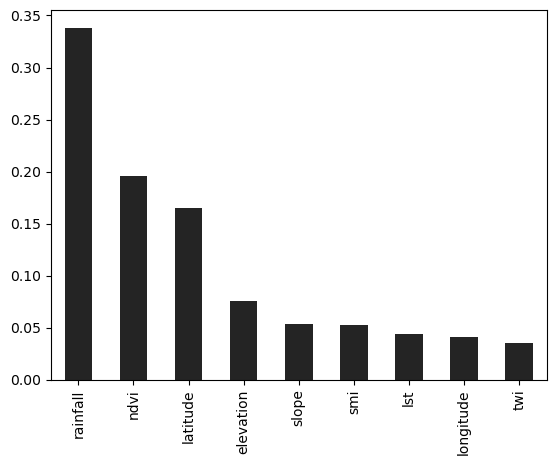

In [145]:
# Estimate the feature importance
feature_imp = pd.Series(dtr_model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

# Plot the feature importance 
feature_imp.plot.bar();

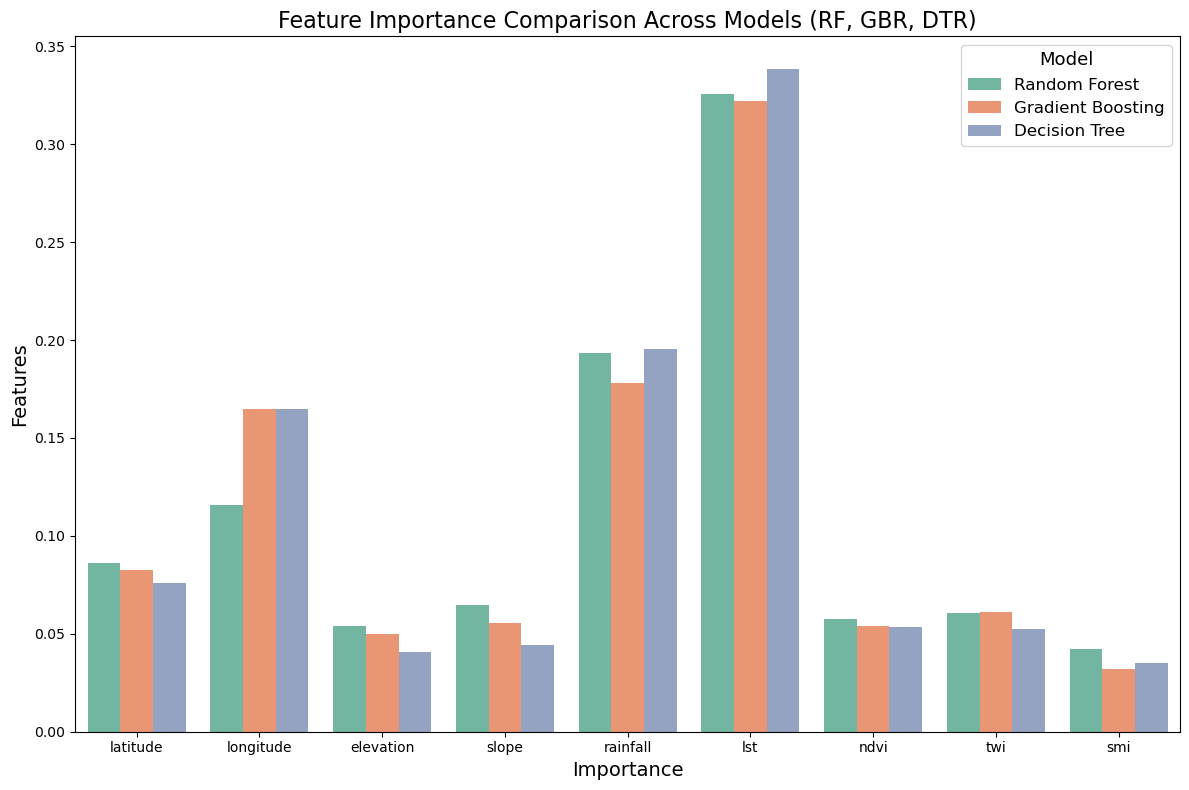

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Feature importances for Random Forest, Gradient Boosting, and Decision Tree models
feature_imp_rf = pd.Series(rf_model.feature_importances_, index=features_list).sort_index()
feature_imp_gbr = pd.Series(gbr_model.feature_importances_, index=features_list).sort_index()
feature_imp_dtr = pd.Series(dtr_model.feature_importances_, index=features_list).sort_index()

# Combine the feature importances into a single DataFrame for plotting
feature_importances = pd.DataFrame({
    'Feature': features_list,
    'Random Forest': feature_imp_rf,
    'Gradient Boosting': feature_imp_gbr,
    'Decision Tree': feature_imp_dtr,
})

# Set the DataFrame to a long format for Seaborn
feature_importances_melted = feature_importances.melt(id_vars='Feature', 
                                                       var_name='Model', 
                                                       value_name='Importance')

# Set the color palette for the plot
palette = sns.color_palette("Set2")  # You can choose other palettes as needed

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='Importance', x='Feature', hue='Model', data=feature_importances_melted, 
            palette=palette, ci=None, orient='v')  # ci=None to remove confidence intervals

plt.title("Feature Importance Comparison Across Models (RF, GBR, DTR)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.legend(title="Model", fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.show()

In [159]:
# Feature importances for Random Forest, Gradient Boosting, and Decision Tree models
feature_imp_rf = pd.Series(rf_model.feature_importances_, index=features_list)
feature_imp_gbr = pd.Series(gbr_model.feature_importances_, index=features_list)
feature_imp_dtr = pd.Series(dtr_model.feature_importances_, index=features_list)

# Combine the feature importances into a single DataFrame
feature_importances_table = pd.DataFrame({
    'Feature': features_list,
    'Random Forest': feature_imp_rf,
    'Gradient Boosting': feature_imp_gbr,
    'Decision Tree': feature_imp_dtr,
})

# Display the table
print(feature_importances_table)

             Feature  Random Forest  Gradient Boosting  Decision Tree
latitude    latitude       0.115560           0.164968       0.164942
longitude  longitude       0.054071           0.049993       0.040845
elevation  elevation       0.085981           0.082614       0.075962
slope          slope       0.057654           0.053914       0.053301
rainfall    rainfall       0.325418           0.322299       0.338179
lst              lst       0.064845           0.055286       0.044203
ndvi            ndvi       0.193409           0.178021       0.195355
twi              twi       0.042311           0.031796       0.034875
smi              smi       0.060753           0.061108       0.052338


### Predicting SOC for Toncatin

### Geranerate Random points

In [92]:
import random
random.seed(42)
from utils.generate_random_point import generate_random_points

num_points = 5000
crs = 4326
random_pnt = generate_random_points(boundary, num_points, crs)
len(random_pnt)

5000

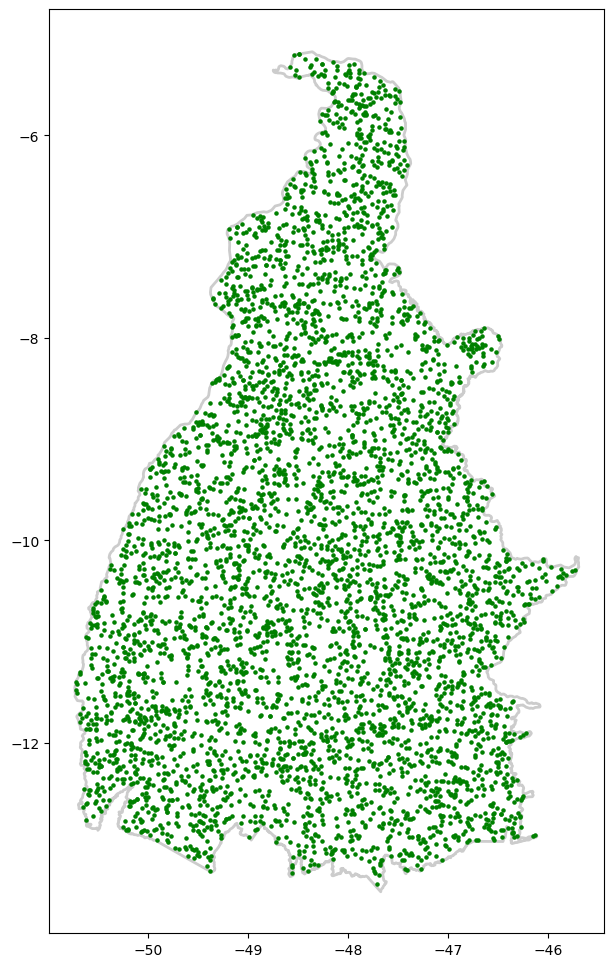

In [93]:
# plot the random points to see the distribution
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1)
ax = boundary.plot(ax=ax, linewidth=2, color='white', edgecolor='0.8')
random_pnt.plot(ax=ax, markersize=5, color='green');

#### Extract all the values from the independent raster data to the predictive random points

In [94]:
# # extract lat and long
random_pnt['longitude'] = random_pnt.geometry.x
random_pnt['latitude'] = random_pnt.geometry.y

In [95]:
import rasterio as rio

# use raterio to load all the data
def open_image(image_path:str):
    image =  rio.open(image_path)
    return image
     
elevation = open_image('output_images/elevation.tif') 
slope = open_image('output_images/slope.tif') 
# landcover = open_image('output_images/landcover.tif') 
rainfall = open_image('output_images/rainfall.tif')
lst = open_image('output_images/lst.tif')
ndvi = open_image('output_images/ndvi.tif') 
twi = open_image('output_images/twi.tif')
smi = open_image('output_images/smi.tif')
# soil_ph = open_image('output_images/soil_ph.tif')
# soil_texture = open_image('output_images/soil_texture.tif')

In [99]:
from utils.extract_raster_values import get_value_to_point

# raster_list = [elevation, slope, landcover,rainfall,lst, ndvi,twi,smi, soil_ph,soil_texture]
raster_list = [elevation, slope,rainfall,lst, ndvi,twi,smi]

random_pnt_copy = random_pnt.copy()
predictive_points = get_value_to_point(random_pnt_copy , raster_list)


# predictive_points['latitude'] = predictive_points.geometry.y
# predictive_points['longitude'] = predictive_points.geometry.x

# drop geomerty field
predictive_points.drop(columns='geometry',inplace=True)

# # Rename Fields
# cols = ['latitude', 'longitude','elevation', 'slope',
#          'landcover', 'rainfall', 'lst',
#          'ndvi','twi','smi', 'soil_ph','soil_texture']

cols = ['latitude','longitude','elevation', 'slope', 'rainfall', 'lst',
         'ndvi','twi','smi']
predictive_points.columns=cols

In [100]:
predictive_points.head()

,latitude,longitude,elevation,slope,rainfall,lst,ndvi,twi,smi
0,-49.354214,-11.615220,286,1.368167,17724.815394,32.136116,0.489802,14.656714,0.860965
1,-49.638764,-9.273612,188,0.159464,20321.456105,31.218834,0.573466,16.939096,0.854161
2,-50.608105,-11.817500,196,0.055248,17295.652034,32.911437,0.374300,0.000000,0.866716
3,-47.462706,-8.945073,307,0.899711,18788.045790,0.000000,0.419069,14.839035,0.000000
4,-49.025110,-12.177343,283,0.465417,16888.426734,36.414908,0.375534,15.244501,0.892703


Predict SOC value using all the model used in this study

In [101]:
# Create a copy of the predictive data for model predictions
predictive_data_model = predictive_points.copy()

# Generate predictions using various models
rf_predictions = rf_model.predict(predictive_data_model)  # Random Forest predictions
svr_predictions = svr_model.predict(predictive_data_model)  # Support Vector Regression predictions
gbr_predictions = gbr_model.predict(predictive_data_model)  # Gradient Boosting Classifier predictions
dtr_predictions = dtr_model.predict(predictive_data_model)  # Decision Tree predictions

# Add prediction results to the DataFrame
predictive_points['rf_predictions'] = rf_predictions
predictive_points['svr_predictions'] = svr_predictions
predictive_points['gbr_predictions'] = gbr_predictions
predictive_points['dtr_predictions'] = dtr_predictions

# Display the first few rows of the DataFrame with the added predictions
predictive_points.head()

,latitude,longitude,elevation,slope,rainfall,lst,ndvi,twi,smi,rf_predictions,svr_predictions,gbr_predictions,dtr_predictions
0,-49.354214,-11.615220,286,1.368167,17724.815394,32.136116,0.489802,14.656714,0.860965,8.399519,8.245443,7.347523,6.520276
1,-49.638764,-9.273612,188,0.159464,20321.456105,31.218834,0.573466,16.939096,0.854161,8.413994,8.245443,7.324315,6.520276
2,-50.608105,-11.817500,196,0.055248,17295.652034,32.911437,0.374300,0.000000,0.866716,7.939074,8.245443,6.608226,6.520276
3,-47.462706,-8.945073,307,0.899711,18788.045790,0.000000,0.419069,14.839035,0.000000,8.422050,8.245443,7.449892,6.520276
4,-49.025110,-12.177343,283,0.465417,16888.426734,36.414908,0.375534,15.244501,0.892703,8.397981,8.245443,6.731491,6.520276


In [102]:
predictive_points.to_csv('predicted_data.csv', index = False)